# Assignment 4. Deep Learning

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

*For questions 2-4 refer to @alregamo on Telegram.*

### Description  
This homework consists of four questions, each aimed at one category in the world of Deep Learning.   
1. Getting familiarized with sentiment analysis (A subject also covered in the course project).
   
2. Multi-layer perceptron (MLP). 
   
3. Convolutional Neural Networks (CNN).
   
4. Variational Autoencoders (VAE).

### Information  
Complete the information box below.

In [1]:
full_name = 'Ilia Hashemi Rad'
student_id = '99102456'

### Note
The questions are not necessarily in order of difficulty. You are obligated to answer **3 out of 4** questions. The fourth question is optional and is considered as bonus.

## 3 Convolutational Neural Networks (CNN)

In this problem, you are going to compare the results of a simple CNN with a pre-trained deep learning model such as VGG16 for a classification task.

For this purpose, we are going to use a publicly available dataset, named CIFAR10. The CIFAR-10 dataset is a popular benchmark in the field of machine learning for image recognition tasks. Here are the key points about this dataset:

1. **Content**: The CIFAR-10 dataset consists of 60,000 32x32 color images. These images are divided into 10 different classes, representing different objects. The classes are airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

2. **Structure**: The dataset is split into two parts: 50,000 images for training and 10,000 images for testing. Each class in the dataset is represented equally, with 6,000 images per class.

3. **Purpose**: CIFAR-10 is widely used for training and evaluating machine learning and image processing systems. It's a benchmark dataset for developing and testing machine learning algorithms, especially in the field of computer vision.

4. **Challenge**: The relatively low resolution of the images (32x32 pixels) makes it a challenging dataset for image classification tasks. The small size of the images means that the details that distinguish between the classes can be quite subtle.

### 3.1 Data Loading

Load the dataset with <code>torchvision.datasets</code> or <code>tensorflow.keras.datasets</code> and split the data into training and test sets.

In [2]:
import tensorflow as tf

# Load the training and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

C:\Users\LENOVO\anaconda3\envs\Desktop\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2

  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 3.2 CNN Model

Build a simple 3-layer CNN model, which takes CIFAR10 images as input and classify their labels. Feel free to use <code>BatchNorm</code> or <code>Pooling</code> layers between your <code>Conv</code> layers. Use 2 layers of fully connected <code>Linear</code> or <code>Dense</code> layers for classificaton.

After building your model, make a summary of your architecture using <code>model.summary()</code> in Keras or <code> torchsummary</code> library for pytorch models.

In [3]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    # First convolutional layer with 32 filters, 3x3 kernel size, ReLU activation, and padding
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    # batch normalization layer
    tf.keras.layers.BatchNormalization(),
    # max pooling layer with 2x2 pool size
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Second convolutional layer with 64 filters, 3x3 kernel size, ReLU activation, and padding
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    # Batch normalization layer
    tf.keras.layers.BatchNormalization(),
    # Max pooling layer with 2x2 pool size
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Third convolutional layer with 128 filters, 3x3 kernel size, ReLU activation, and padding
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    # Batch normalization layer
    tf.keras.layers.BatchNormalization(),
    # Max pooling layer with 2x2 pool size
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Flatten the output of the last convolutional layer
    tf.keras.layers.Flatten(),
    # First dense layer with 256 units and ReLU activation
    tf.keras.layers.Dense(256, activation='relu'),
    # Dropout layer with 0.5 dropout rate
    tf.keras.layers.Dropout(0.5),
    # Second dense layer with 10 units and softmax activation for the 10 classes
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 32, 32, 32)        896       

                                                                 

 batch_normalization (Batch  (None, 32, 32, 32)        128       

 Normalization)                                                  

                                                                 

 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         

 D)                                                              

                                                                 

 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     

                                                                 

 batch_normalization_1 (Bat  (None, 16, 16, 64)        256       

 chNormalization)                                                

                                        

### 3.3 Train your Model

Train your model for 20 epochs by using Adam optimizer for the training. Plot the accuracy curves for your training and test data during the training phase. Also plot the loss curves as well. 

You can use interactive tools such as <code>tensorboard</code> for these visualizations.

In [4]:
# Compile the model with Adam optimzer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit and train the model with 20 epochs
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_split=0.2)

Epoch 1/20

1250/1250 [==============================] - 46s 36ms/step - loss: 1.6225 - accuracy: 0.4242 - val_loss: 1.3564 - val_accuracy: 0.5197

Epoch 2/20

1250/1250 [==============================] - 46s 37ms/step - loss: 1.2239 - accuracy: 0.5691 - val_loss: 1.1913 - val_accuracy: 0.5845

Epoch 3/20

1250/1250 [==============================] - 46s 37ms/step - loss: 1.0385 - accuracy: 0.6370 - val_loss: 1.0537 - val_accuracy: 0.6397

Epoch 4/20

1250/1250 [==============================] - 45s 36ms/step - loss: 0.9205 - accuracy: 0.6835 - val_loss: 0.8219 - val_accuracy: 0.7149

Epoch 5/20

1250/1250 [==============================] - 45s 36ms/step - loss: 0.8293 - accuracy: 0.7123 - val_loss: 0.8457 - val_accuracy: 0.7167

Epoch 6/20

1250/1250 [==============================] - 46s 36ms/step - loss: 0.7493 - accuracy: 0.7406 - val_loss: 0.7878 - val_accuracy: 0.7351

Epoch 7/20

1250/1250 [==============================] - 45s 36ms/step - loss: 0.6850 - accuracy: 0.7625 - val_l

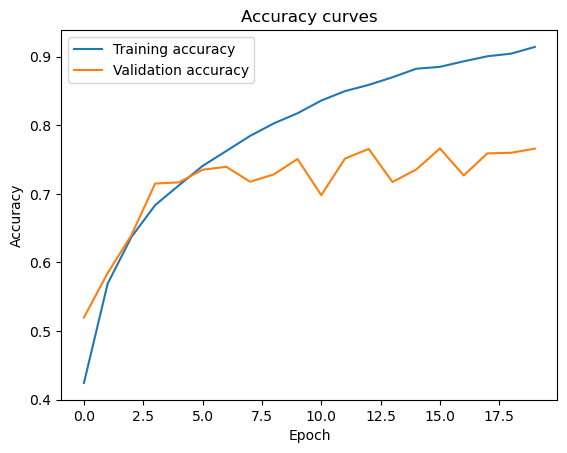

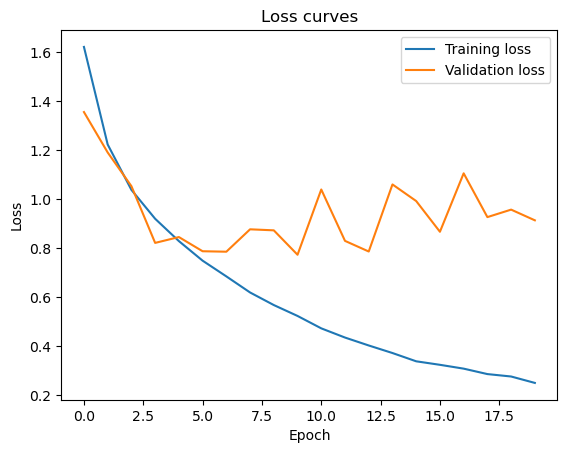

In [5]:
import matplotlib.pyplot as plt

# Plot the accuracy curves
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 3.4 Evaluate your Model

Now that you have trained your model, do the followings:

* plot your model's confusion matrix on the test set.
* report its final accuracy on your test set.
* show some images from the test set with their corresponding true label and your predictions.

In [7]:
Recall = tf.keras.metrics.Recall
Precision = tf.keras.metrics.Precision

# Compile the model with the additional metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Recall(), Precision()])

# Evaluate the model with four variables
test_loss, test_acc, test_recall, test_precision = model.evaluate(x_test, y_test, batch_size=32)


313/313 [==============================] - 4s 11ms/step - loss: 0.9238 - accuracy: 0.7602 - recall: 0.7362 - precision: 0.7908


313/313 [==============================] - 3s 11ms/step


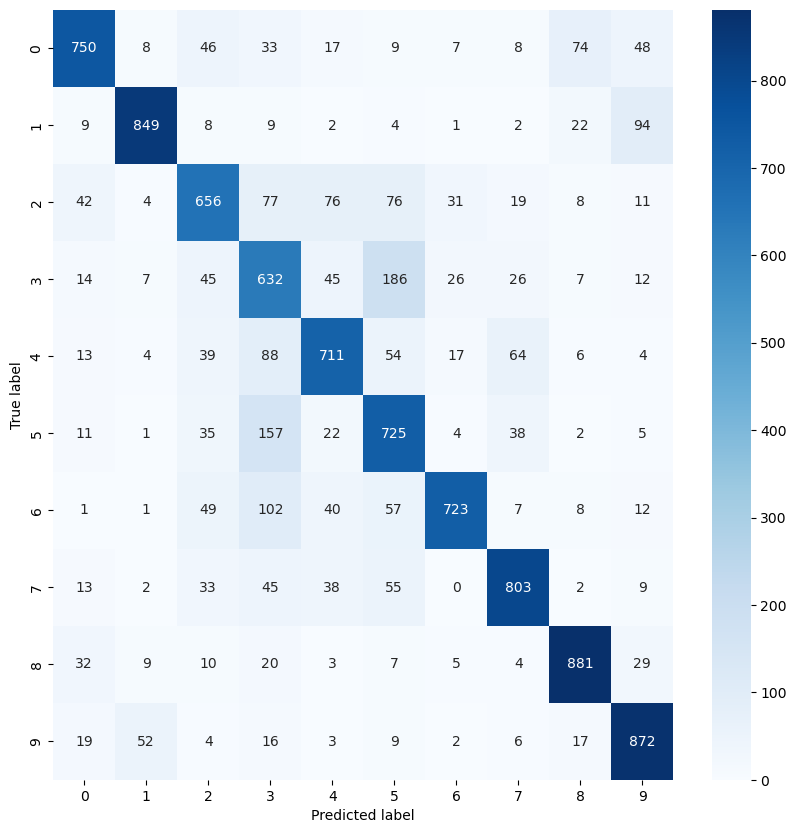

In [8]:
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predicted labels and the true labels
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Get the confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [9]:
print(f'Test accuracy: {test_acc:.2f}')

Test accuracy: 0.76


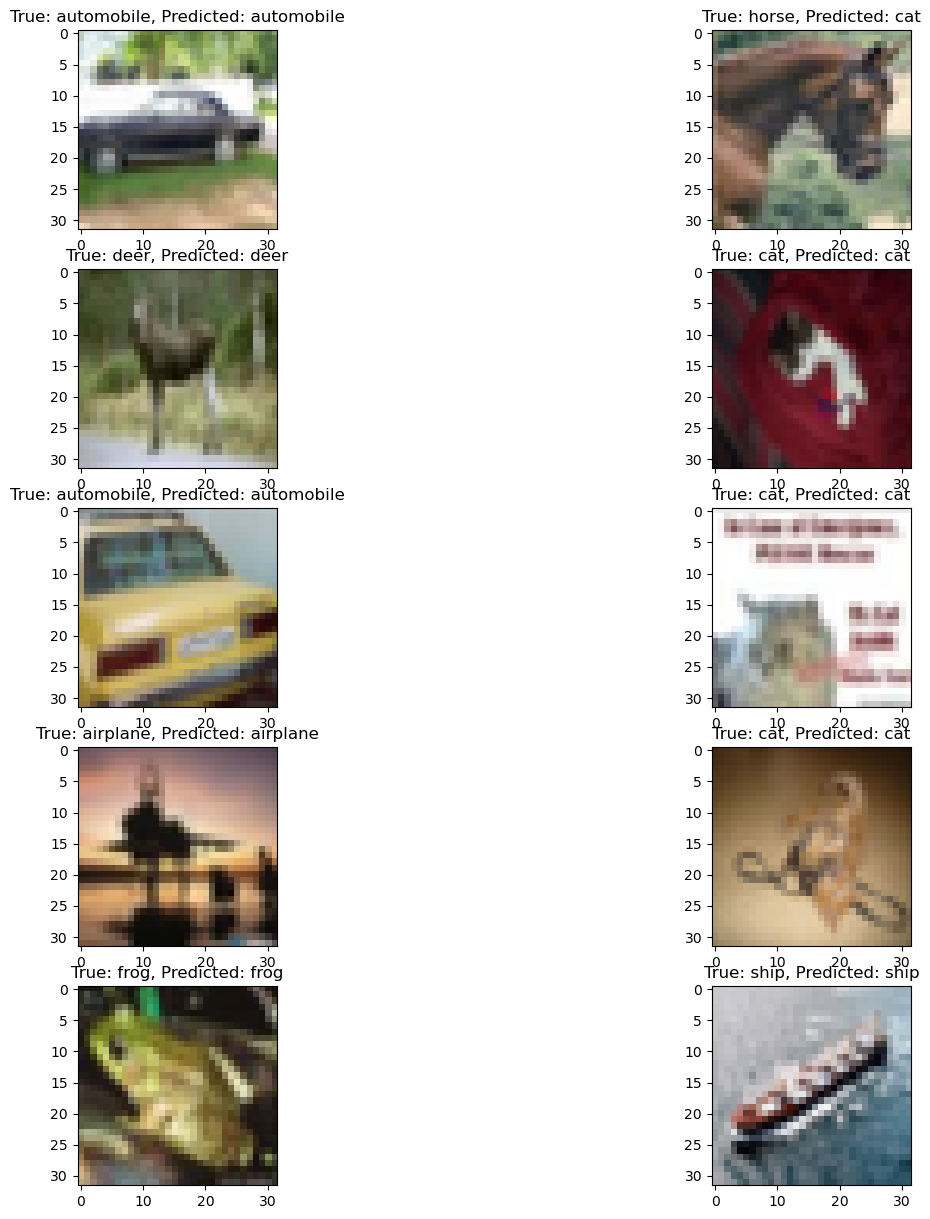

In [12]:
import matplotlib.pyplot as plt

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Select 10 random indices from the test set
indices = np.random.choice(len(x_test), 10)

# Show the images with the true label and the predicted label
plt.figure(figsize=(15, 15))
for i, index in enumerate(indices):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_test[index])
    plt.title(f'True: {class_names[y_true[index]]}, Predicted: {class_names[y_pred[index]]}')
plt.show()

### VGG16 Model and Transfer Learning

VGG16 is a popular convolutional neural network (CNN) architecture that was introduced by Karen Simonyan and Andrew Zisserman from the University of Oxford in a 2014 paper titled "Very Deep Convolutional Networks for Large-Scale Image Recognition." Here are the key points about the VGG16 model:

1. **Architecture**: VGG16 is named for its 16 layers that have weights. The architecture is characterized by its simplicity, using only 3x3 convolutional layers stacked on top of each other in increasing depth. Reducing volume size is handled by max pooling. The final architecture includes several fully connected layers.

2. **Uniform Design**: One of the defining aspects of VGG16 is its uniformity. All hidden layers use the same 3x3 convolutional filters with a stride of 1 and the same max pooling filters of 2x2 with a stride of 2. This consistency makes the architecture easy to scale and adapt.

3. **Depth**: The depth of the network (16 layers) was a significant feature at the time of its introduction. The increased depth helps the network to learn more complex patterns in the data.

4. **Performance**: In the ImageNet competition, which is a benchmark in image classification, VGG16 significantly improved upon the architectures that had been used previously, demonstrating the power of deeper neural networks.

5. **Applications**: VGG16, and its larger counterpart VGG19, are widely used in image processing. They are used both as standalone models for image classification tasks and as feature extraction parts of larger models in more complex tasks.

6. **Transfer Learning**: Due to its simplicity and high performance on benchmark datasets, VGG16 is often used as a pre-trained model for transfer learning, especially in tasks where training data might be limited. In this context, VGG16 trained on a large dataset like ImageNet is adapted to a new task with a relatively small amount of new data.

7. **Resource Intensity**: One downside of VGG16 is that it is resource-intensive, both in terms of the number of parameters and computation. This can make it less practical for deployment in resource-constrained environments.

VGG16 represents a key milestone in the development of deep learning architectures for image recognition, and it remains a popular choice for both academic and practical applications in the field of computer vision.

Here we want to use a VGG16 pre-trained model (trained on the ImageNet dataset) and use a transfer learning approach to fine-tune the model for our dataset. 

Certainly! Fine-tuning a pre-trained VGG16 model on the CIFAR-10 dataset is a common practice in deep learning, especially to demonstrate the power of transfer learning. Here are the steps and explanations you can provide to your students:

#### Understanding Transfer Learning and Fine-Tuning
- **Transfer Learning**: It's a technique where a model developed for one task is reused as the starting point for a model on a second task. It's especially popular in deep learning where large models take a lot of resources to train.
- **Fine-Tuning**: Involves tweaking the pre-trained model slightly to adapt it to a new, but similar task. In this case, fine-tuning a VGG16 model pre-trained on ImageNet to work on CIFAR-10.


### 3.5 Building your Model

Importing the VGG16 Model from TensorFlow or PyTorch models and load the model with pre-trained weights.

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, UpSampling2D

# Import the VGG16 model with the given input of 32, 32, 7
input_tensor = Input(shape=(32, 32, 3))
upsampled = UpSampling2D((7, 7))(input_tensor)
vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_tensor=upsampled)#, input_shape=(224, 32, 3))

CIFAR-10 images are 32x32 pixels, much smaller than the ImageNet images VGG16 was trained on (224x224 pixels). Decide on a strategy to handle this (e.g., resize CIFAR-10 images or modify the VGG16 input layer). Also, CIFAR-10 images need to be preprocessed to be compatible with VGG16. This includes normalizing pixel values in the same way as was done for the ImageNet images.

For this preprocessing steps, you can use <code>torchvision.transforms</code> in PyTorch or <code>tensorflow.keras.preprocessing.image.ImageDataGenerator</code> in TensorFlow.

#### Handling the difference between input size of VGG16 and CIFAR-10 images was done at first by 2D UpSampling the input tensors of VGG16 which are our (32,32,3) images by a factor of (7, 7). And for Preprocessing, the below method worked best after many tests.

In [3]:
import tensorflow as tf

# Load the training and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 [==============================] - 8s 0us/step


Besides, you need to replace the output layer (or fully connected layers) of VGG16 to match the number of classes in CIFAR-10 (10 classes). This is because the original VGG16 model output is designed for 1,000 classes (ImageNet).

In [4]:
# Define the model
model = tf.keras.Sequential([
    # VGG16 layer at first
    vgg16,
    # Flatten the output of the last convolutional layer
    tf.keras.layers.Flatten(),
    # First dense layer with 256 units and ReLU activation
    tf.keras.layers.Dense(256, activation='relu'),
    # Dropout layer with 0.5 dropout rate
    tf.keras.layers.Dropout(0.5),
    # Second dense layer with 10 units and softmax activation for the 10 classes
    tf.keras.layers.Dense(10, activation='softmax')                                 
])


"Freeze" the weights of the earlier layers of the model. This means the weights in these layers won’t be updated during training. Usually, the earlier layers of a CNN capture generic features like edges and textures that are also useful for new tasks.

Only the weights of the newly added output layer (and possibly the previous fully connected layers) of the model is need to be trained.

In [5]:
# Freeze the layers of VGG16 Except the last one
for layer in model.layers[:-4]:
    layer.trainable = False

### 3.6 Training your Model
Train the model on the CIFAR-10 training data for 20 epochs by using Adam optimizer. Remember you only need to update the weights of the unfrozen layers to adapt the model to the CIFAR-10 dataset.

Plot the accuracy curves for your training and test data during the training phase. Also plot the loss curves as well. 

You can use interactive tools such as <code>tensorboard</code> for these visualizations.

In [6]:
# Compile the model with Adam Optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 21140042 (80.64 MB)
Trainable params: 6425354 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [7]:
# Fit and train the model with 20 epochs
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=20,
                    validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 101s 77ms/step - loss: 1.6998 - accuracy: 0.3574 - val_loss: 1.2218 - val_accuracy: 0.5953
Epoch 2/20
1250/1250 [==============================] - 94s 75ms/step - loss: 1.5105 - accuracy: 0.4184 - val_loss: 1.1579 - val_accuracy: 0.6066
Epoch 3/20
1250/1250 [==============================] - 94s 75ms/step - loss: 1.4607 - accuracy: 0.4371 - val_loss: 1.1285 - val_accuracy: 0.6343
Epoch 4/20
1250/1250 [==============================] - 94s 75ms/step - loss: 1.4089 - accuracy: 0.4570 - val_loss: 1.0984 - val_accuracy: 0.6494
Epoch 5/20
1250/1250 [==============================] - 94s 75ms/step - loss: 1.3795 - accuracy: 0.4654 - val_loss: 1.0480 - val_accuracy: 0.6591
Epoch 6/20
1250/1250 [==============================] - 94s 75ms/step - loss: 1.3632 - accuracy: 0.4708 - val_loss: 1.0254 - val_accuracy: 0.6707
Epoch 7/20
1250/1250 [==============================] - 94s 75ms/step - loss: 1.3330 - accuracy: 0.4819 - val_loss: 1.1013 

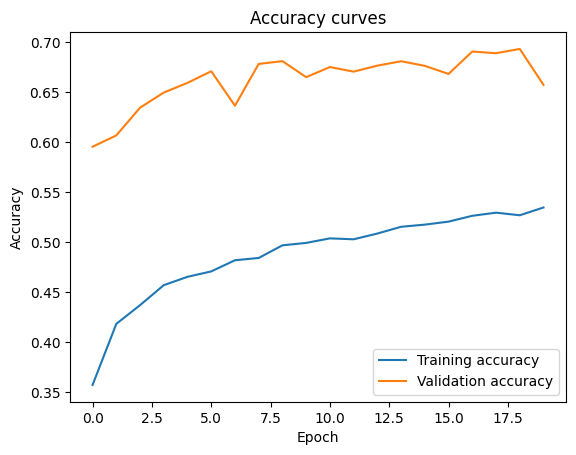

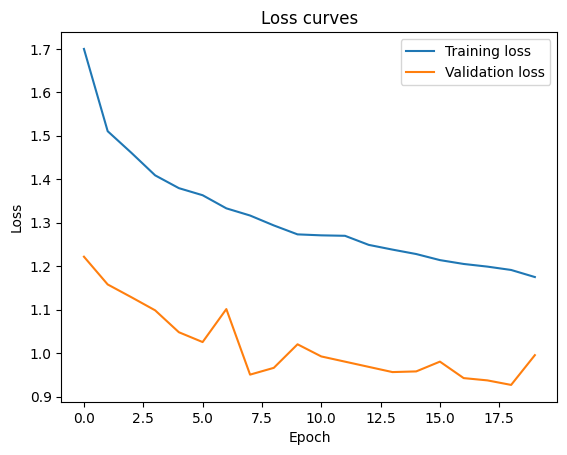

In [14]:
import matplotlib.pyplot as plt

# Plot the accuracy curves
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 3.7 Evaluate your Model

Now that you have trained your model, do the followings:

* plot your model's confusion matrix on the test set.
* report its final accuracy on your test set.
* show some images from the test set with their corresponding true label and your predictions.

In [9]:
# Evaluate the model with four variables
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=32)


313/313 [==============================] - 19s 60ms/step - loss: 1.0132 - accuracy: 0.6573


313/313 [==============================] - 18s 58ms/step


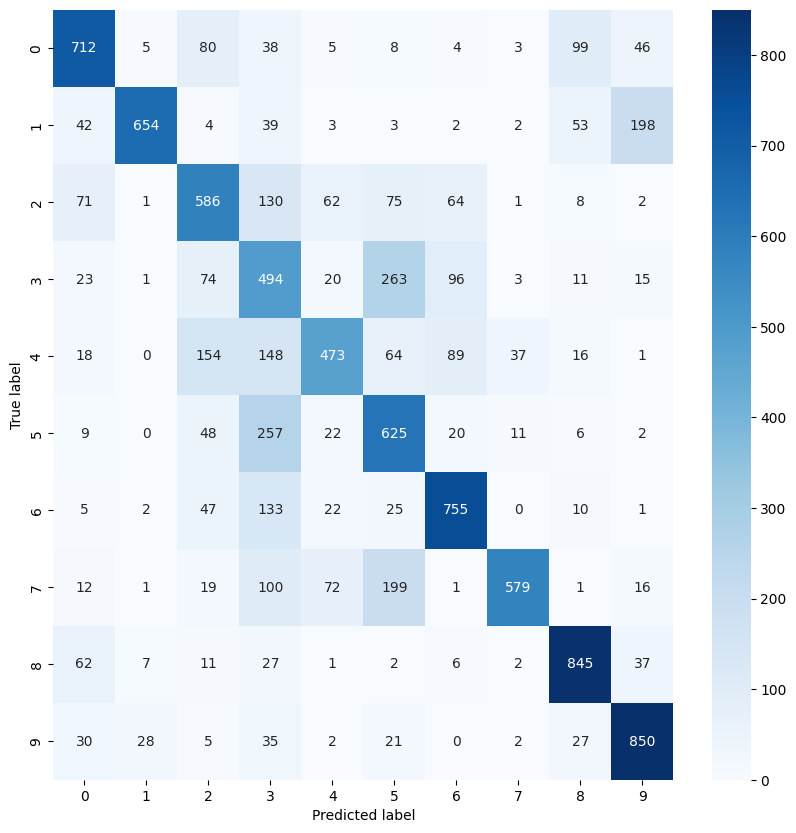

In [10]:
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predicted labels and the true labels
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Get the confusion matrix
cm = metrics.confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [11]:
print(f'Test accuracy: {test_acc:.2f}')

Test accuracy: 0.66


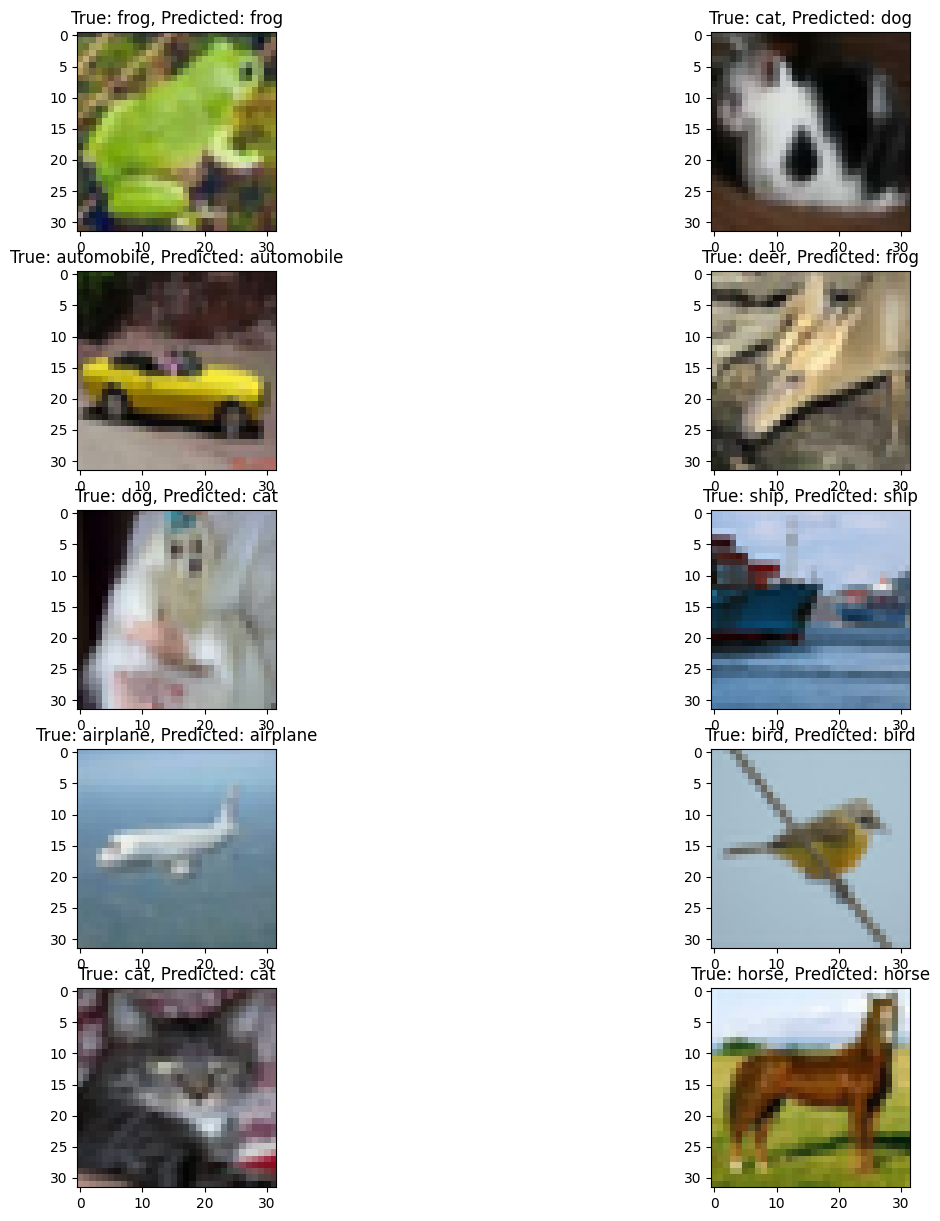

In [13]:
import matplotlib.pyplot as plt

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Select 10 random indices from the test set
indices = np.random.choice(len(x_test), 10)

# Show the images with the true label and the predicted label
plt.figure(figsize=(15, 15))
for i, index in enumerate(indices):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_test[index])
    plt.title(f'True: {class_names[y_true[index]]}, Predicted: {class_names[y_pred[index]]}')
plt.show()

### 3.8 Discussing and Comparison
- Discuss the advantages of transfer learning in terms of training time and accuracy scores.
- Also, cover potential drawbacks, like overfitting if the new dataset is too small or too different from the original dataset the model was trained on.

### Advantages of Transfer Learning in General:

- Transfer learning can reduce the training time significantly, as the model does not need to learn from scratch. The model can leverage the knowledge and features learned from the previous problem, and only fine-tune the relevant parts for the new problem. This can speed up the convergence and reduce the risk of overfitting.
- Transfer learning can improve the accuracy of the model, especially when the new problem has limited or scarce data. The model can benefit from the rich and diverse data of the previous problem, and avoid the problem of underfitting or high bias. The model can also generalize better to unseen data, as it has learned from a larger and more representative dataset.
- Transfer learning can enable the model to handle complex problems, that may not have enough data or resources to train a model from scratch. The model can be sinched with the new problem by transferring the relevant knowledge and features from the previous problem, and learn the new features of the problem with minimal data. This maked the model more versatile

### Disadvantages of Transfer Learning in General:

- Transfer learning can cause overfitting or underfitting, if the new problem is too different from the original problem. The model may not be able to transfer the relevant knowledge and features from the previous problem, and may learn irrelevant or misleading patterns from the new problem. The model may also lose some of the important information or features of the new problem, if they are not captured by the previous problem. This can reduce the accuracy and generalization of the model.
- Transfer learning can cause mismatching or inconsistency, if the new problem has a different input or output format than the original problem(like our case which is explained further). The model may not be able to accept or produce the desired input or output, and may require some modifications or adaptations to the model architecture or parameters. This can increase the complexity and difficulty of the model, and may affect the performance and stability of the model.


### Advantages of Simple CNN in our Experiment:

1. **Faster Convergence with Simple Model:**
   - Our manually defined model with a simpler architecture achieved a higher accuracy (76%) compared to the VGG16-based model (66%). This could be due to the simplicity of our model, allowing for faster convergence. Smaller models often require less time to train.
   - As you observed, training the VGG16-based model took longer, mainly due to the larger number of parameters. Fine-tuning the entire VGG16 model, including the last layer, contributed to this increased training time.
    
2. **Fewer Trainable Parameters:**
   - The manually defined model had significantly fewer trainable parameters (about 700k) compared to the VGG16-based model (about 6.5 million). This reduction in parameters not only contributes to faster training but can also help mitigate overfitting, especially when dealing with a limited amount of training data.

3. **Domain Relevance:**
   - In this case we had no domain relevance. VGG16 was pre-trained on ImageNet, which has a different input size and a more diverse set of images. Our CIFAR-10 dataset, being smaller and with lower-resolution images, may not fully benefit from the pre-trained features of VGG16.

In conclusion, while transfer learning is a powerful technique, its effectiveness depends on the specifics of the source and target domains.Our results show the importance of adapting the pre-trained model appropriately and considering the characteristics of the new dataset for optimal performance. That was why the simple CNN which I designed worked better than the vgg16 based model.